In [160]:
from __future__ import print_function, division
import numpy as np
import networkx as nx

In [161]:
from sdcn import AE
from Main_Code_Repo.Utils import unpickle_object
from Main_Code_Repo.Plotting import graph_cluster_plot

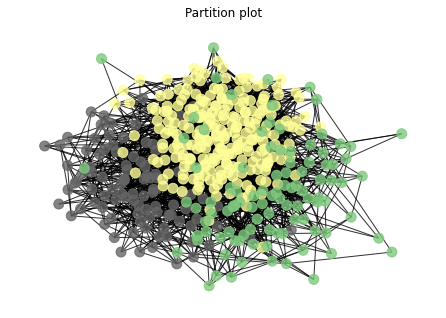

In [172]:
##### LOAD and PROCESS THE DATA IN THE REQUIRED FORMATS
data_location = '/Users/ryznerf/Documents/0_MIT/Spring_2022/0_Projects/3_Networks_project/community-detetction-deep-learning/Data/'

g_name = 'tc3'

data_file = g_name + '.pkl'
data = data_location + data_file
g = unpickle_object(data)
graph_cluster_plot(g)

In [173]:
labels = []
for i in range(len(g.graph['partition'])):
    labels = labels + [*g.graph['partition'][i],]

In [174]:
# count the number of nodes
g_clusters = g.graph['partition']
total_objects = 0
for i in range(len(g_clusters)):
    total_objects += len(g_clusters[i])

# mark their cluster membership
labels = np.zeros(total_objects)  # this needs to be saved or passed
for i in range(len(g_clusters)):
    labels[[*g_clusters[i],]] = i

# get the graph adjecency matrix
A = np.array(nx.adjacency_matrix(g).todense())

# get the edge list xx_graph.txt
edge_list = list(g.edges)

labels = labels.astype(int)
A = A.astype(int)

/var/folders/4y/fdvhr84d173bbkc7r_xcyjz80000gn/T/ipykernel_4157/190075459.py:13: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = np.array(nx.adjacency_matrix(g).todense())


In [175]:
# save edge list
save_location = '/Users/ryznerf/Documents/0_MIT/Spring_2022/0_Projects/3_Networks_project/community-detetction-deep-learning/Main_Code_Repo/DL_Methods/SDCN_final/data/'
graph_save_loc = '/Users/ryznerf/Documents/0_MIT/Spring_2022/0_Projects/3_Networks_project/community-detetction-deep-learning/Main_Code_Repo/DL_Methods/SDCN_final/graph/'

# save the graph
name = g_name + '_graph.txt'
nx.write_edgelist(g, graph_save_loc+name, data=False)

# save adjacency
name = g_name  + '.txt'
np.savetxt(save_location+name, A, fmt ="%i")

# save the labels
name = g_name + '_label.txt'
np.savetxt(save_location+name, labels, fmt = "%i")


In [176]:
A.dtype

dtype('int64')